## Google Colab and GitHub Links
- Google colab link if you are using an IDE:
    - https://colab.research.google.com/drive/1nuZP2vxpEATY-TVELBEF35pzo8vJfHzm?usp=sharing
- GitHub link:
    - https://github.com/brencemoore/AutoClaimAI
  

## Import Data Set for Evaluation
- Dataset from: https://www.kaggle.com/datasets/prajwalbhamere/car-damage-severity-dataset

In [3]:
! pip install gdown

import gdown
import os

# Zipped file from https://www.kaggle.com/datasets/prajwalbhamere/car-damage-severity-dataset
file_id = '1e9yHo7HWqZp513DkLirDK2ehq1j4-gZR'
output_filename = 'car-damage-severity-dataset.zip'

# Check if the file already exists
if os.path.exists(output_filename):
    print(f"Found existing file: {output_filename}. Removing it now...")
    os.remove(output_filename)
    print("Existing file removed.")
else:
    print(f"No existing file named {output_filename} found. Proceeding with download.")

gdown.download(id=file_id, output=output_filename, quiet=False)

print("Download complete.")

if os.path.exists('data3a/'):
    print(f"Found existing folder: data/. Removing it now...")
    !rm -r data3a/
    print("Existing folder removed.")
else:
    print(f"No existing folder named data/ found. Proceeding with unzip.")

print("Unzipping data")
!unzip -q car-damage-severity-dataset.zip

!ls -lh


Found existing file: car-damage-severity-dataset.zip. Removing it now...
Existing file removed.


Downloading...
From: https://drive.google.com/uc?id=1e9yHo7HWqZp513DkLirDK2ehq1j4-gZR
To: /content/car-damage-severity-dataset.zip
100%|██████████| 14.4M/14.4M [00:00<00:00, 244MB/s]

Download complete.
Found existing folder: data/. Removing it now...


Existing folder removed.
Unzipping data
total 14M
-rw-r--r-- 1 root root  14M Nov 23 19:55 car-damage-severity-dataset.zip
drwxr-xr-x 4 root root 4.0K Nov 23 20:01 data3a
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data


In [12]:
# Path to data:
# data3a/validation/
#     01-minor/
#     02-moderate/
#     03-severe/

import pandas as pd
import numpy as np

minor_path = './data3a/validation/01-minor/'
moder_path = './data3a/validation/02-moderate/'
severe_path = './data3a/validation/03-severe/'

minor_list = []
moder_list = []
severe_list = []

# Records a list of all minor damaged list
for filename in os.listdir(minor_path):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        minor_list.append(filename)

for filename in os.listdir(moder_path):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        moder_list.append(filename)

for filename in os.listdir(severe_path):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        severe_list.append(filename)

minor_df = pd.DataFrame({
    'filename': minor_list,
    'severity': ['MINOR'] * len(minor_list)
})

moderate_df = pd.DataFrame({
    'filename': moder_list,
    'severity': ['MODERATE'] * len(moder_list)
})

severe_df = pd.DataFrame({
    'filename': severe_list,
    'severity': ['SEVERE'] * len(severe_list)
})

damage_df = [minor_df, moderate_df, severe_df]
damage_df = pd.concat(damage_df, ignore_index=True)

damage_df.head(10)

,filename,severity
0,images (75).jpeg,MINOR
1,images (100).jpeg,MINOR
2,images (65).jpeg,MINOR
3,images (33).jpeg,MINOR
4,e9e9890e7b514e51a49442c72f463430_thb.jpg,MINOR
5,images - 2022-12-13T213955.048.jpeg,MINOR
6,images (84).jpeg,MINOR
7,images (2).jpeg,MINOR
8,0008.jpeg,MINOR
9,download.jpeg,MINOR


## Import Model Used for Damage Severity Classification
- Same as used in GitHub and function pipeline
- Source from: https://huggingface.co/nezahatkorkmaz/car-damage-level-detection-yolov8

In [13]:
file_id = '19pDXbQY2WI3h7oVhJDe30iWpt5QIVX_d'
output_filename = 'car-damage.pt'

# Check if the file already exists
if os.path.exists(output_filename):
    print(f"Found existing file: {output_filename}. Removing it now...")
    os.remove(output_filename)
    print("Existing file removed.")
else:
    print(f"No existing file named {output_filename} found. Proceeding with download.")

gdown.download(id=file_id, output=output_filename, quiet=False)

print("Download complete.")

!ls -lh

No existing file named car-damage.pt found. Proceeding with download.


Downloading...
From: https://drive.google.com/uc?id=19pDXbQY2WI3h7oVhJDe30iWpt5QIVX_d
To: /content/car-damage.pt
100%|██████████| 2.96M/2.96M [00:00<00:00, 22.8MB/s]


Download complete.
total 17M
-rw-r--r-- 1 root root 2.9M Nov 23 08:41 car-damage.pt
-rw-r--r-- 1 root root  14M Nov 23 19:55 car-damage-severity-dataset.zip
drwxr-xr-x 4 root root 4.0K Nov 23 20:01 data3a
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data


In [14]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00


In [16]:
# Classifies the severity of the damage on the car
def damage_severity(image_path):
    from ultralytics import YOLO
    from pathlib import Path

    model_path = "car-damage.pt"
    model = YOLO(model_path)
    results = model(image_path)

    # Extract classification probabilities
    probs = results[0].probs

    severity = ['Minor', 'Moderate', 'Severe']

    return severity[probs.top1].upper()


In [18]:
# Test if model works on 1 image

severity = damage_severity(f'{minor_path}/{damage_df['filename'][0]}')

print(f'\nPrediction: {severity}')
print(f'Actual: {damage_df['severity'][0]}')


image 1/1 /content/data3a/validation/01-minor/images (75).jpeg: 128x128 01-minor 0.99, 02-moderate 0.01, 03-severe 0.00, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 0.2ms postprocess per image at shape (1, 3, 128, 128)

Prediction: MINOR
Actual: MINOR


## Evaluate Model
- Because of the size of the dataset, there is not need to create a sampled dataset.


In [28]:
# List for tracking predictions
pred_list = []
count = 1

# Runs model on entire dataset
for row in damage_df['filename']:
    index = damage_df[damage_df['filename'] == row].index.to_list()[0]

    if damage_df['severity'][index] == 'MINOR':
        path = f'./data3a/validation/01-minor/{row}'

    if damage_df['severity'][index] == 'MODERATE':
        path = f'./data3a/validation/02-moderate/{row}'

    if damage_df['severity'][index] == 'SEVERE':
        path = f'./data3a/validation/03-severe/{row}'

    severity = damage_severity(path)

    pred_list.append(severity)
    print(count)
    count += 1

print(pred_list)



image 1/1 /content/data3a/validation/01-minor/images (75).jpeg: 128x128 01-minor 0.99, 02-moderate 0.01, 03-severe 0.00, 12.1ms
Speed: 4.2ms preprocess, 12.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
1

image 1/1 /content/data3a/validation/01-minor/images (100).jpeg: 128x128 01-minor 0.97, 02-moderate 0.03, 03-severe 0.00, 7.2ms
Speed: 0.9ms preprocess, 7.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
2

image 1/1 /content/data3a/validation/01-minor/images (65).jpeg: 128x128 01-minor 0.54, 02-moderate 0.41, 03-severe 0.05, 7.7ms
Speed: 1.0ms preprocess, 7.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
3

image 1/1 /content/data3a/validation/01-minor/images (33).jpeg: 128x128 01-minor 0.89, 02-moderate 0.09, 03-severe 0.01, 8.3ms
Speed: 1.0ms preprocess, 8.3ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
4

image 1/1 /content/data3a/validation/01-minor/e9e9890e7b514e51a49442c72f463430_thb.jpg: 128x

In [29]:
result_df = damage_df
result_df['pred_severity'] = pred_list
result_df

,filename,severity,pred_severity
0,images (75).jpeg,MINOR,MINOR
1,images (100).jpeg,MINOR,MINOR
2,images (65).jpeg,MINOR,MINOR
3,images (33).jpeg,MINOR,MINOR
4,e9e9890e7b514e51a49442c72f463430_thb.jpg,MINOR,MODERATE
...,...,...,...
84,ff6f1e2cd433470f94e54c7aeb7da545_thb.jpg,SEVERE,MODERATE
85,images.jpeg,SEVERE,MINOR
86,22902b00ea70402fab96a350f87cf944_thb.jpg,SEVERE,MODERATE
87,download (2).jpeg,SEVERE,SEVERE


## Create Confusion Matrix

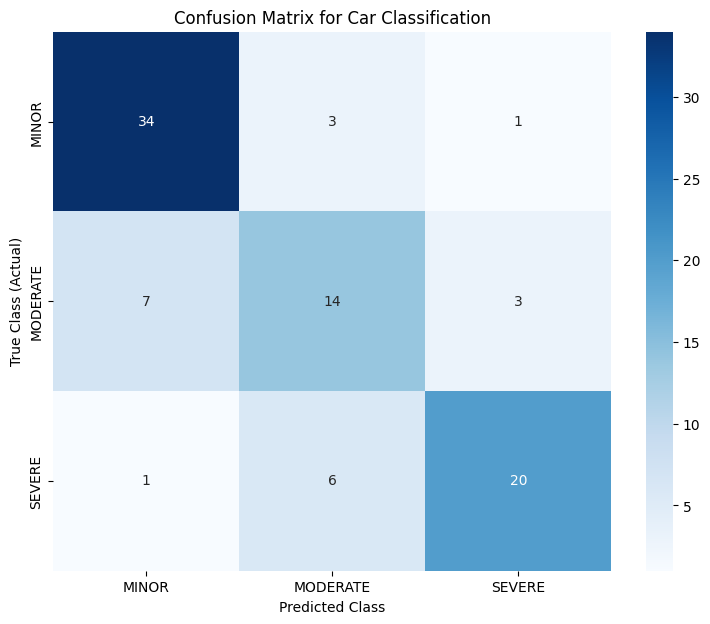

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

classes = ['MINOR', 'MODERATE', 'SEVERE']

cm = confusion_matrix(
    y_true = np.array(result_df['severity']),
    y_pred = np.array(result_df['pred_severity']),
    labels = classes
)

cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# This confusion matrix is still used for main evaluation metrics
plt.figure(figsize=(9, 7))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True
)

plt.title('Confusion Matrix for Car Classification')
plt.ylabel('True Class (Actual)')
plt.xlabel('Predicted Class')
plt.show()

In [31]:
# Report from scikit-learn library
# Calculates: precision, recall, f1; and the from those: micro average, macro average, and weighted average
report = classification_report(
    y_true = result_df['severity'],
    y_pred = result_df['pred_severity'],
    labels = classes,
    zero_division = 0,
    output_dict=True
)
print(report)

report_df = pd.DataFrame.from_dict(report).transpose()
report_df = report_df.round(3)
report_df

{'MINOR': {'precision': 0.8095238095238095, 'recall': 0.8947368421052632, 'f1-score': 0.85, 'support': 38.0}, 'MODERATE': {'precision': 0.6086956521739131, 'recall': 0.5833333333333334, 'f1-score': 0.5957446808510638, 'support': 24.0}, 'SEVERE': {'precision': 0.8333333333333334, 'recall': 0.7407407407407407, 'f1-score': 0.7843137254901961, 'support': 27.0}, 'accuracy': 0.7640449438202247, 'macro avg': {'precision': 0.7505175983436853, 'recall': 0.7396036387264457, 'f1-score': 0.7433528021137533, 'support': 89.0}, 'weighted avg': {'precision': 0.7625910158885245, 'recall': 0.7640449438202247, 'f1-score': 0.7615094711085485, 'support': 89.0}}


,precision,recall,f1-score,support
MINOR,0.810,0.895,0.850,38.000
MODERATE,0.609,0.583,0.596,24.000
SEVERE,0.833,0.741,0.784,27.000
accuracy,0.764,0.764,0.764,0.764
macro avg,0.751,0.740,0.743,89.000
weighted avg,0.763,0.764,0.762,89.000


### Download Files
- Downloads the final metrics report as a .csv file for other use


In [32]:
# Downloads report as .csv file
from google.colab import files

OUTPUT_FILE = 'car_severity_metrics.csv'

print("Exportint Metrics to .csv file:")
report_df.to_csv(OUTPUT_FILE, index=True)

print(f'Downloading: {OUTPUT_FILE}')
files.download(OUTPUT_FILE)

Exportint Metrics to .csv file:
Downloading: car_severity_metrics.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>